# 5 微分

对给定的黑盒 (black box) 函数 $f$ 求导, 即允许对任意 $x$ 计算 $f(x)$, 但不知道 $f$ 的表达式. 数值微分是病态的, 如 $\sqrt x$ 在 $x=0$ 处求导无界.

## 有限差分

有限差分 (finite difference) 依据导数的定义求导. 由泰勒公式易证明

1. 前向微分 (forward difference) $\frac{f(t+h)-f(t)}{h}= f'(t)+O(h)$
2. 后向微分 (backward difference) $\frac{f(t)-f(t-h)}{h}= f'(t)+O(h)$
2. 中心微分 (central difference) $\frac{f(t+h)-f(t-h)}{2h}= f'(t)+O(h^2)$

### 舍入误差

记机器精度 $\mathbf u$, 由于如下舍入误差项的限制, $h$ 不能太小
1. 前向微分 (forward difference) $\frac{f(t+h)-f(t)}{h}= f'(t)+O(h+\frac{\mathbf u}{h})$
2. 后向微分 (backward difference) $\frac{f(t)-f(t-h)}{h}= f'(t)+O(h+\frac{\mathbf u}{h})$
2. 中心微分 (central difference) $\frac{f(t+h)-f(t-h)}{2h}= f'(t)+O(h^2+\frac{\mathbf u}{h})$

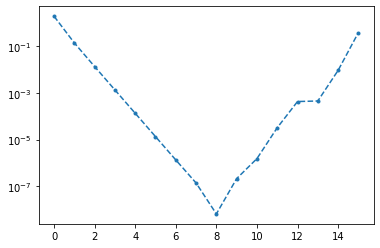

In [3]:
from math import exp 
from matplotlib import pyplot as plt
f = lambda x: exp(x)
hs = [10**(-i) for i in range(0,16)]
ds = [(f(1+h)-f(1))/h for h in hs] # numerical derivative at x = 1
es = [abs(d - f(1)) for d in ds] # error
plt.semilogy(range(0,16), es, '.--')
plt.show()

### 误差估计

前向/后向微分误差
$$\left|f'(t) - fl\left(\frac{f(t\pm h) - f(t)}{\pm h}\right)\right|\leqslant \frac 12\Vert f''(x)\Vert_\infty h +2\frac{\mathbf u}{h}=E$$

其中右侧最佳估计与 $\mathbf u^\frac 12$ 同阶:
$$E=\frac 12\Vert f''(x)\Vert_\infty h +2\frac{\mathbf u}{h}\geqslant 2\sqrt{\Vert f''(x)\Vert_\infty}\sqrt{\mathbf u}$$

根据取等, 应该选取 $h_*=\Theta \mathbf (u^\frac 12)$ 使得误差估计最小, 此时 $E_* = \Theta (\mathbf u^\frac 12)$

<br>

对于中心微分的误差估计, 有 $h_* = \Theta(\mathbf u^\frac 13)$ 以及 $E_* =\Theta (\mathbf u^\frac 23)$. 

由于 $\mathbf u<1$, 可知 $\Theta (\mathbf u^\frac 23)<\Theta (\mathbf u^\frac 12)$. 中心微分可以更准确.

### 高阶泰勒

引入更多的项可以更精确, 如 (不考虑舍入误差时)
$$f'(t) = \frac{f(t-2h)-8f(t-h)+8(t+h)-f(t+2h)}{12} +O(h^4)$$

### 理查德森外推法 

使用理查德森外推法 (Richardson extrapolation), 注意以下展开式只有偶数次项
$$F_0(h) = \frac{f(t+h)- f(t-h)}{2h}=f'(t)+c_2h^2+c_4h^4+\dotsc$$

取递推
$$F_{k}(h) = \frac{4^kF_{k-1}(h/2) - F_{k-1}(h)}{4^k-1}=f'(t)+O(h^{2(k+1)})$$


### 高阶导数

如

$$f''(t) = \frac{f(t-h)-2f(t)+f(t+h)}{h^2}+O(h^2)$$

以及对应的偏微分

$$\frac{\partial ^2}{\partial  x^2}f(x,y) = \frac{f(x-h,y)-2f(x,y)+f(x+h,y)}{h^2}+O(h^2)$$



## 插值

### 拉格朗日插值

为了求 $x=t$ 处导数, 可以取邻域内多个点 $x_1,x_2,\dotsc,x_n$, 用其插值函数拟合 $f(x)$:
$$p(x) =\sum_{k=1}^n f(x_k) \prod_{j\neq k}\frac{x - x_j}{x_k - x_j}$$
再计算 $p(x)$ 在 $x = t$ 的导数.

### 自然样条插值

假设 $f(x)$ 在区间上的自然样条插值为 $s(x)$, 设插值节点最大间距为 $h$, 则
$$\begin{aligned}\Vert s(x) - f(x)\Vert_\infty\leqslant 
\Vert f^{(4)}(x)\Vert_\infty \cdot O(h^4)\\\Vert s'(x) - f(x)\Vert_\infty\leqslant 
\Vert f^{(4)}(x)\Vert_\infty \cdot O(h^3)\\\Vert s''(x) - f(x)\Vert_\infty\leqslant 
\Vert f^{(4)}(x)\Vert_\infty \cdot O(h^2)\end{aligned}$$

### Tikhonov 正则化

Tikhonov 正则化 (Tikhonov regularization) 是针对有扰动的数据的函数的问题.

给定 $(x_i,y_i)\ (i=1,2,\dotsc,n)$ 且具有扰动 
$|y_i - f(x_i)|\leqslant \delta$. 希望找到光滑函数 $s(x)$ 使得
$$\frac 1n\sum_{i=1}^n (y_i - s(x_i))^2 \leqslant \delta^2$$
且 $\Vert s''(x)\Vert_\infty$ 尽可能小.

## 柯西积分

显然也可以通过柯西积分将微分转为复积分.

$$f^{(k)}=\frac{k!}{2\pi i}\int_\Gamma \frac{f(z)dz}{(z - x_0)^{k+1}}dz
=\frac{k!}{2\pi r^k}\int_0^{2\pi}e^{-ik\theta}f(x_0 + re^{i\theta})d\theta$$